# **House Price Prediction**

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the data

df = pd.read_csv("/content/House_Price_Prediction.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
# information of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
# shape of the dataframe

df.shape

(4746, 12)

In [ ]:
# how many cities data we have?

df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

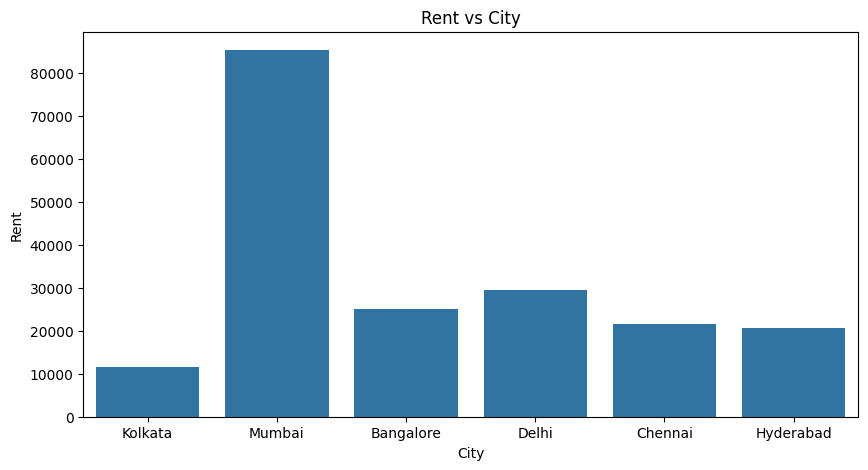

In [ ]:
# visualization of data in bar plot (Rent vs City)

plt.figure(figsize=(10, 5))
plt.title("Rent vs City")
plt.xlabel("City")
plt.ylabel("Rent")
sns.barplot(x=df['City'], y=df['Rent'], errorbar=None)
plt.show()

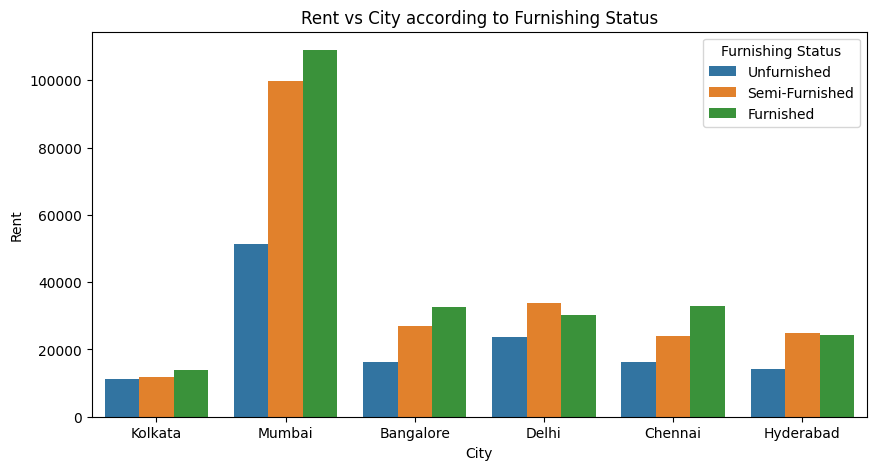

In [ ]:
# visualization of data in bar plot (Rent vs City) according to Furnishing Status
# average value of rent

plt.figure(figsize=(10, 5))
plt.title("Rent vs City according to Furnishing Status")
plt.xlabel("City")
plt.ylabel("Rent")
sns.barplot(x=df['City'], y=df['Rent'],errorbar=None, hue=df['Furnishing Status'])
plt.show()

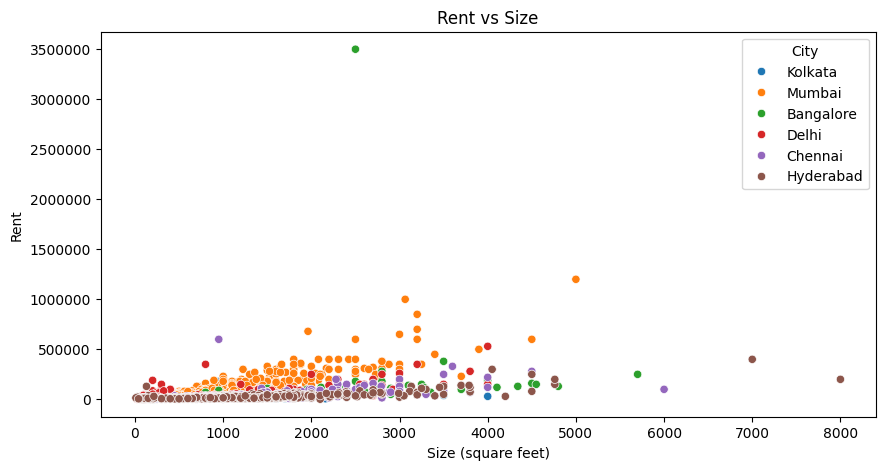

In [ ]:
# visualization of data in scatter plot (Rent vs Size)

plt.figure(figsize=(10, 5))
plt.title("Rent vs Size")
plt.xlabel("Size (square feet)")
plt.ylabel("Rent")
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(data=df, x="Size", y="Rent", hue="City")
plt.show()

In [ ]:
# in banglore city there is one outlier present in Rent, so we will drop that point

max_rent = df["Rent"].max()
out = df[df["Rent"]==max_rent].index
df = df.drop(out)

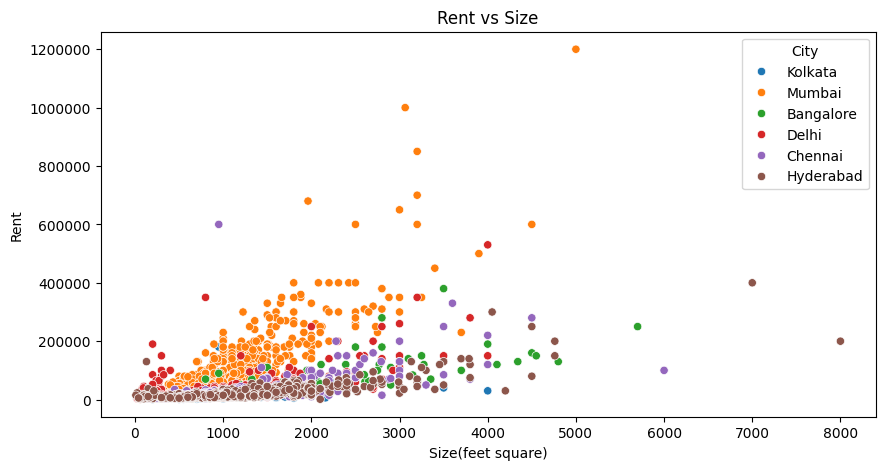

In [ ]:
# after removing the outlier the visualization of data in scatter plot (Rent vs Size)

plt.show()
plt.figure(figsize=(10, 5))
plt.title("Rent vs Size")
plt.xlabel("Size(feet square)")
plt.ylabel("Rent")
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(data=df, x="Size", y="Rent",hue="City")
plt.show()

**First we will convert all the categorial features into numerical format to fit the model using "*One Hot Encoding*"**

In [ ]:
# One Hot Encoding

df = pd.get_dummies(df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])


In [ ]:
df

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Bandam Kommu,2,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4742,2022-05-15,3,29000,2000,1 out of 4,"Manikonda, Hyderabad",3,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4743,2022-07-10,3,35000,1750,3 out of 5,"Himayath Nagar, NH 7",3,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4744,2022-07-06,3,45000,1500,23 out of 34,Gachibowli,2,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [ ]:
# Types of the dataframe
#  uint = unit int
df.dtypes

Posted On                            object
BHK                                   int64
Rent                                  int64
Size                                  int64
Floor                                object
Area Locality                        object
Bathroom                              int64
Area Type_Built Area                  uint8
Area Type_Carpet Area                 uint8
Area Type_Super Area                  uint8
City_Bangalore                        uint8
City_Chennai                          uint8
City_Delhi                            uint8
City_Hyderabad                        uint8
City_Kolkata                          uint8
City_Mumbai                           uint8
Furnishing Status_Furnished           uint8
Furnishing Status_Semi-Furnished      uint8
Furnishing Status_Unfurnished         uint8
Tenant Preferred_Bachelors            uint8
Tenant Preferred_Bachelors/Family     uint8
Tenant Preferred_Family               uint8
Point of Contact_Contact Agent  

In [ ]:
# "Posted On" column in dataframe

df['Posted On'] = pd.to_datetime(df["Posted On"])

In [ ]:
df['day of week posted'] = df['Posted On'].dt.day_of_week

df['day posted'] = df['Posted On'].dt.day

df['month posted'] = df['Posted On'].dt.month

df['quarter poster'] = df['Posted On'].dt.quarter

In [ ]:
# "Floor" column in dataframe

df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [ ]:
df['Floor No'] = df['Floor'].apply(lambda n : str(n).split()[0])
df['Total Floor'] = df['Floor'].apply(lambda x : str(x).split()[-1])

In [ ]:
df['Floor No'] = df['Floor No'].replace(['Ground'], 0)
df['Floor No'] = df['Floor No'].replace(['Upper'], -1)
df['Floor No'] = df['Floor No'].replace(['Lower'], -2)
df['Total Floor'] = df['Total Floor'].replace(['Ground'], 0)

In [ ]:
# drop unnecessary column from dataframe

df.drop(['Posted On','Floor','Area Locality'], axis=1, inplace=True)

In [ ]:
# drop null value from the dataframe

df = df.dropna()

In [ ]:
# shape of the dataframe

df.shape

(4745, 28)

In [ ]:
# drop duplicate value from dataframe

print(df.duplicated().sum())
df = df.drop_duplicates()

11


In [ ]:
# converting all of the data in numeric format

for col in df.columns:
    if df[col].dtype != int:
        df[col] = df[col].astype(int)

df.head()

<ipython-input-99-2bee4fccc63b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)


,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,day of week posted,day posted,month posted,quarter poster,Floor No,Total Floor
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,2,18,5,2,0,2
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,0,1,4,13,5,2,1,3
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,0,1,0,16,5,2,1,3
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,4,7,3,1,2
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,0,9,5,2,1,2


In [ ]:
# information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4734 entries, 0 to 4745
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BHK                                4734 non-null   int64
 1   Rent                               4734 non-null   int64
 2   Size                               4734 non-null   int64
 3   Bathroom                           4734 non-null   int64
 4   Area Type_Built Area               4734 non-null   int64
 5   Area Type_Carpet Area              4734 non-null   int64
 6   Area Type_Super Area               4734 non-null   int64
 7   City_Bangalore                     4734 non-null   int64
 8   City_Chennai                       4734 non-null   int64
 9   City_Delhi                         4734 non-null   int64
 10  City_Hyderabad                     4734 non-null   int64
 11  City_Kolkata                       4734 non-null   int64
 12  City_Mumbai         

In [ ]:
# defining target (y) and features (X)

y = df['Rent']
X = df.drop('Rent', axis = 1)

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
# shape of train and test sample

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3787, 27), (947, 27), (3787,), (947,))

In [ ]:
# model selection (RandomForestRegressor)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
model.fit(X_train, y_train.ravel())


RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [ ]:
# To check the model accuracy

from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Predicting the Test and Train set results

y_pred= model.predict(X_test)
x_pred= model.predict(X_train)

In [ ]:
# R2 Score

r2score = r2_score(y_test, y_pred)
print(f'R2 Score of the model is: ', r2score)

R2 Score of the model is:  -0.033523568215666266


In [ ]:
# Mean Absolute Error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error of the model is: ', mae)

Mean Absolute Error of the model is:  20947.83027957963


In [ ]:
# Mean Squared Error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the model is: ', mse)

Mean Squared Error of the model is:  2347498570.946699


In [ ]:
# Model Accuracy Score

train_accuracy = model.score(X_train, y_train.values.ravel())
test_accuracy = model.score(X_test, y_test.values.ravel())

print(f"Training Accuracy: {round(train_accuracy, 2)}")
print(f"Testing Accuracy: {round(test_accuracy, 2)}")

Training Accuracy: 0.96
Testing Accuracy: 0.75
